In [20]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import autokeras as ak

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
def load_data(directory, width=200, height=200, color_mode='rgb', train_size=0.75):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory, image_size=(width, height), color_mode=color_mode, batch_size=None)
    images, labels = zip(*dataset.as_numpy_iterator())
    images = np.array(images); labels = np.array(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size=train_size)
    if color_mode == 'grayscale':
        x_train_count, width, height, depth = x_train.shape
        x_train = x_train.reshape(x_train_count, width, height)
        x_test_count, width, height, depth = x_test.shape
        x_test = x_test.reshape(x_test_count, width, height)
    return (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = load_data('sports', width=200, height=200)

Found 441 files belonging to 4 classes.


In [10]:
print(x_train.shape)
print(y_train.shape)
print(y_train[:15])

(330, 200, 200, 3)
(330,)
[1 1 3 3 1 2 0 1 2 3 2 2 2 0 2]


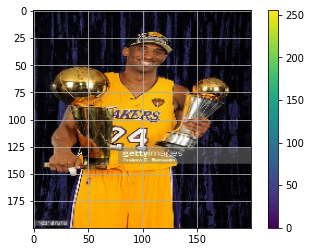

In [11]:
plt.figure()
plt.imshow(x_train[1].astype('uint8'))
plt.colorbar()
plt.grid(True)
plt.show()

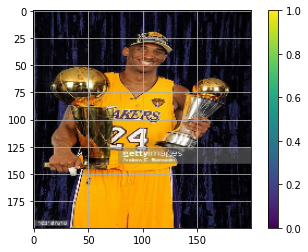

In [12]:
x_train = x_train / 255.0
x_test = x_test / 255.0
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(True)
plt.show()

In [13]:
clf = ak.ImageClassifier(max_trials=1)
clf.fit(x_train, y_train, epochs=6)
print(clf.evaluate(x_test, y_test))

INFO:tensorflow:Reloading Oracle from existing project .\image_classifier\oracle.json
INFO:tensorflow:Reloading Tuner from .\image_classifier\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/6
11/11 [==============================] - 12s 1s/step - loss: 12.3802 - accuracy: 0.2909
Epoch 2/6
11/11 [==============================] - 12s 1s/step - loss: 1.1661 - accuracy: 0.4879
Epoch 3/6
11/11 [==============================] - 13s 1s/step - loss: 1.0121 - accuracy: 0.5576
Epoch 4/6
11/11 [==============================] - 13s 1s/step - loss: 0.6724 - accuracy: 0.7909
Epoch 5/6
11/11 [==============================] - 13s 1s/step - loss: 0.2912 - accuracy: 0.9364
Epoch 6/6
11/11 [==============================] - 12s 1s/step - loss: 0.1003 - accuracy: 0.9909
INFO:tensorflow:Assets written to: .\image_classifier\best_model\assets
4/4 [==============================] - 1s 207ms/step - loss: 1.1444 - accuracy: 0.5946
[1.1443564891815186, 0.5945945978164673]


4/4 [==============================] - 1s 205ms/step


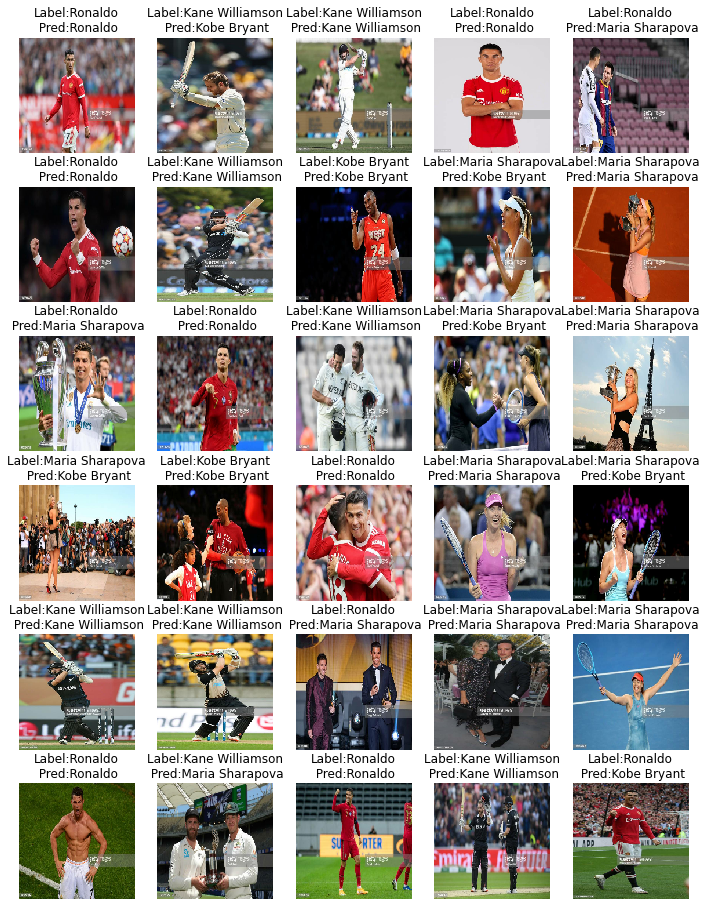

In [14]:
y_pred = clf.predict(x_test)

class_names = ['Kane Williamson', 'Kobe Bryant', 'Maria Sharapova', 'Ronaldo']
plt.figure(figsize=(12,16))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(x_test[i], cmap='gray', interpolation='none')
    plt.title("Label:{}\n Pred:{}".format(
        class_names[y_test[i]], class_names[int(y_pred[i][0])]))
    plt.axis('off')

In [21]:
from keras.models import load_model

save_model('Imgage_Cla.h5')

NameError: name 'save_model' is not defined